In [26]:
# %load ../config/defaults.py
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from ncbi_remap.notebook import Nb
from ncbi_remap.plotting import make_figs
from ncbi_remap.normalization import tpm


In [6]:
# %load ../config/mongo.py
from pymongo import MongoClient
try:
    with open('../output/.mongodb_host', 'r') as fh:
        host = fh.read().strip()
except FileNotFoundError:
    host = 'localhost'

mongoClient = MongoClient(host=host, port=27017)
db = mongoClient['sra']
ncbi = db['ncbi']


In [3]:
metadata = pd.read_csv('../output/geo-wf/rnaseq_metadata.tsv', sep='\t', index_col=0)
testis = metadata.query('tissue == "testis"').index.tolist()

In [29]:
df = pd.read_parquet('../output/aln-downstream-wf/gene_counts_wide.parquet', columns=testis)
gene_lengths = pd.read_parquet('../output/aln-downstream-wf/gene_lengths.parquet').gene_length
df = tpm(df, gene_lengths)

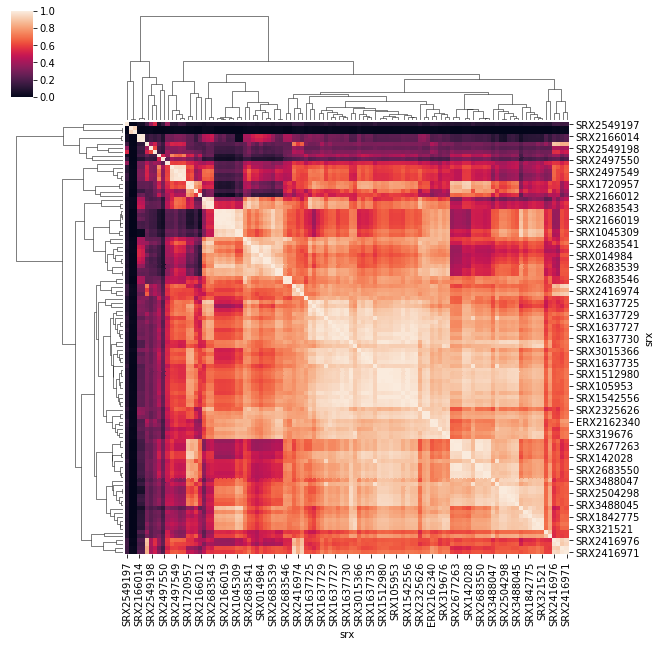

In [30]:
sns.clustermap(df.corr())

In [31]:
_corr = df.corr()

In [35]:
mask = _corr.median() > .6

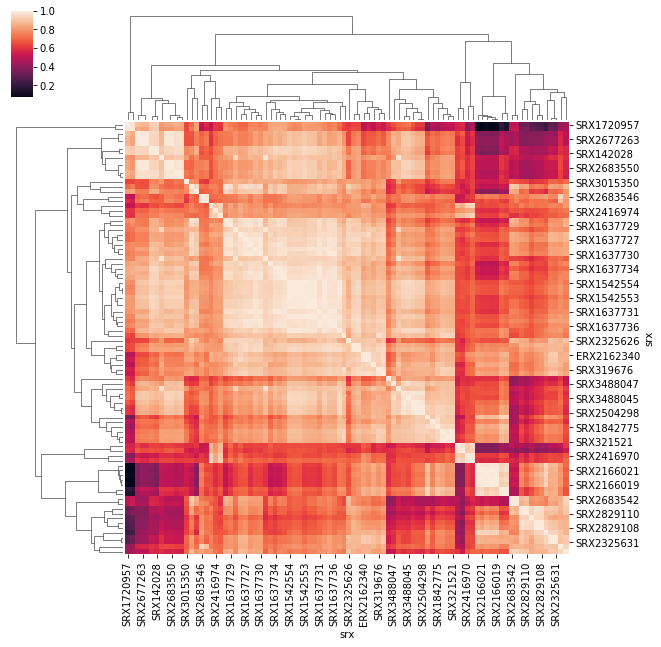

In [36]:
sns.clustermap(_corr.loc[mask, mask])

In [47]:
metadata.loc['SRX2549199']

title                                                                NaN
organism                                         Drosophila melanogaster
study                                                          SRP099174
runs                                                          SRR5242352
GEO Experiment                                                       NaN
GEO Sample                                                           NaN
BioSample ID                                                SAMN06318806
BioProject                                                   PRJNA373931
pubmed                                                               NaN
pubmed_title                                                         NaN
pubmed_citation                                                      NaN
pubmed_authors                                                       NaN
contact                Stefanie Gerstberger <sgerstberg@rockefeller.edu>
sex                                                

In [9]:
ncbi.find_one({'_id': 'SRX2549199'}, {'sra.run.tax_analysis': 0})

{'_id': 'SRX2549199',
 '_cls': 'Ncbi',
 'sra': {'submission': {'submission_id': 'SRA536871',
   'external_id': [],
   'secondary_id': [],
   'submitter_id': [],
   'uuid': []},
  'organization': {'organization_type': 'institute',
   'name': 'Rockefeller University',
   'email': 'sgerstberg@rockefeller.edu',
   'first_name': 'Stefanie',
   'last_name': 'Gerstberger'},
  'study': {'study_id': 'SRP099174',
   'BioProject': 'PRJNA373931',
   'external_id': [],
   'secondary_id': [],
   'submitter_id': [],
   'uuid': [],
   'title': "The conserved RNA exonuclease Rexo5 is required for 3' end maturation of 28S rRNA, 5S rRNA, and snoRNAs",
   'study_type': 'Other',
   'abstract': "Non-coding RNA biogenesis in higher eukaryotes has not been fully characterized. Here, we studied the Drosophila melanogaster Rexo5 (CG8368) protein, a metazoan-specific member of the DEDDh 3'-5' single-stranded RNA exonucleases, by genetic, biochemical, and RNA sequencing approaches. Rexo5 is required for small nuc